<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Breadth-First-Search" data-toc-modified-id="Breadth-First-Search-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Breadth First Search</a></span></li><li><span><a href="#Uniform-Cost-Search" data-toc-modified-id="Uniform-Cost-Search-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uniform Cost Search</a></span></li><li><span><a href="#Huristic-search" data-toc-modified-id="Huristic-search-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Huristic search</a></span></li><li><span><a href="#A*" data-toc-modified-id="A*-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>A*</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparison</a></span></li></ul></div>

In [291]:
import numpy as np
from itertools import product
from queue import Queue, PriorityQueue
import matplotlib.pyplot as plt

In [373]:
class Map():
    def __init__(self, size):
        self.size = size
        self.map = np.zeros(self.size)
        self.costs = np.random.rand(self.size[0], self.size[1]) * 10 + np.random.rand() * 10
        
    def visit(self, coords):
        x, y = coords[0], coords[1]
        self.map[x,y] = 1
        
    def add_obstacles(self, obstacles):
        for obstacle in obstacles:
            self.map[obstacle] = 4
        
    def belongs(self, coords):
        x, y = coords[0], coords[1]
        if x in range(self.size[0]) and y in range(self.size[1]):
            return True
        return False
        
    def neighbors(self, coords):
        x, y = coords[0], coords[1]
        current = self.map[x,y]
        x_ = [x + 1, x, x - 1]
        y_ = [y + 1, y, y - 1]
        N = product(x_, y_)
        N = [n for n in N if self.belongs(n) and n != coords and self.map[n] != 4]
        return N
    
    def show_map(self):
        plt.imshow(m.map)
        plt.show()
    
    def show_neighbours(self, coords):
        x, y = coords[0], coords[1]
        mutable_map = self.map.copy()
        mutable_map[x,y] = 2
        N = self.neighbors(coords)
        for n in N:
            mutable_map[n[0], n[1]] = 1
        plt.imshow(mutable_map)
        plt.show()
        
    def show_path(self, path):
        mutable_map = self.map.copy()
        mutable_map[mutable_map == 1] = 0
        mutable_map[path[0]] = 2
        mutable_map[path[-1]] = 3
        path.pop(0)
        path.pop(-1)
        for p in path:
            mutable_map[p] = 1
        plt.imshow(mutable_map)
        plt.show()

## Breadth First Search

In [374]:
def bfs(start, goal, m):
    frontier = Queue()
    frontier.put(start)
    m.visit(start)

    came_from = {}
    came_from[start] = None

    while not frontier.empty():
        current = frontier.get()
        for n in m.neighbors(current):
            if n not in came_from.keys():
                frontier.put(n)
                came_from[n] = current
                m.visit(n)

    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
        
    return path

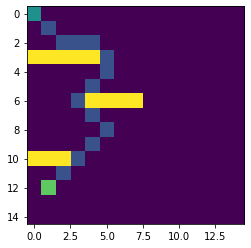

In [375]:
m = Map((15,15))
m.add_obstacles([(3,0), (3,1),(3,2),(3,3), (3,4), (6, 4), (6, 5), (6,6), (6,7), (10, 0), (10, 1), (10, 2)])

start = (12,0)
goal = (0,0)

path = bfs(start, goal, m)
m.show_path(path)

## Uniform Cost Search

In [351]:
def ucs(start, goal, m):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    m.visit(start)

    came_from = {}
    acc_costs = {}
    came_from[start] = None
    acc_costs[start] = 0

    while not frontier.empty():
        current = frontier.get()
        for n in m.neighbors(current):
            current_cost = acc_costs[current] + m.costs[n]
            if n not in acc_costs.keys() or current_cost < acc_costs[n]:
                acc_costs[n] = current_cost
                frontier.put(n, current_cost)
                came_from[n] = current

    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
        
    return path

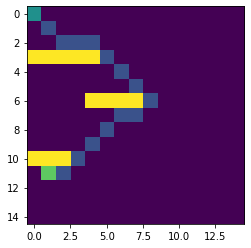

In [360]:
m = Map((15,15))
m.add_obstacles([(3,0), (3,1),(3,2),(3,3), (3,4), (6, 4), (6, 5), (6,6), (6,7), (10, 0), (10, 1), (10, 2)])

start = (12,0)
goal = (0,0)

path = ucs(start, goal, m)
m.show_path(path)

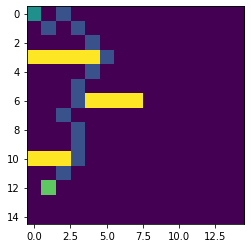

In [352]:
m = Map((15,15))
m.add_obstacles([(3,0), (3,1),(3,2),(3,3), (3,4), (6, 4), (6, 5), (6,6), (6,7), (10, 0), (10, 1), (10, 2)])

start = (12,0)
goal = (0,0)

path = ucs(start, goal, m)
m.show_path(path)

## Huristic search

In [379]:
def heuristic(a, b):
   return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [382]:
def hs(start, goal, m):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    m.visit(start)

    came_from = {}
    came_from[start] = None

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        for n in m.neighbors(current):
            if n not in came_from.keys():
                frontier.put(n, heuristic(goal, n))
                came_from[n] = current


    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
        
    return path

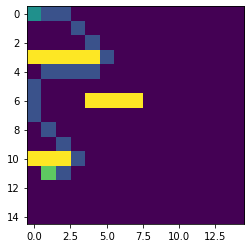

In [386]:
m = Map((15,15))
m.add_obstacles([(3,1), (3,1),(3,2),(3,3), (3,4), (6, 4), (6, 5), (6,6), (6,7), (10, 0), (10, 1), (10, 2)])

start = (12,0)
goal = (0,0)

path = hs(start, goal, m)
m.show_path(path)

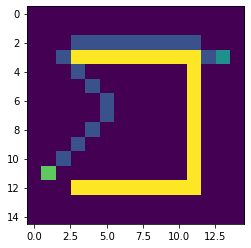

In [423]:
obstacles = [(3, i) for i in range(3,12)]  
obstacles += [(12, i) for i in range(3,12)]
obstacles += [(i, 11) for i in range(3, 12)]

m = Map((15,15))
m.add_obstacles(obstacles)

start = (12,0)
goal = (3,13)

path = bfs(start, goal, m)

m.show_path(path)

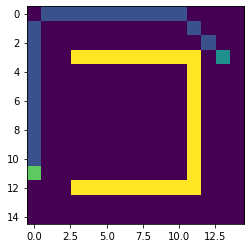

In [424]:
obstacles = [(3, i) for i in range(3,12)]  
obstacles += [(12, i) for i in range(3,12)]
obstacles += [(i, 11) for i in range(3, 12)]

m = Map((15,15))
m.add_obstacles(obstacles)

start = (12,0)
goal = (3,13)

path = hs(start, goal, m)

m.show_path(path)

## A*

In [425]:
def heuristic(a, b):
   return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [426]:
def astar(start, goal, m):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    m.visit(start)

    came_from = {}
    acc_costs = {}
    came_from[start] = None
    acc_costs[start] = 0

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        for n in m.neighbors(current):
            current_cost = acc_costs[current] + m.costs[n]
            if n not in acc_costs.keys() or current_cost < acc_costs[n]:
                acc_costs[n] = current_cost
                frontier.put(n, current_cost + heuristic(goal, n))
                came_from[n] = current

    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
        
    return path

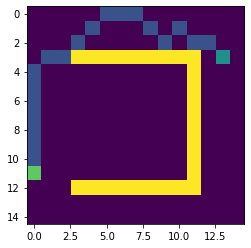

In [445]:
obstacles = [(3, i) for i in range(3,12)]  
obstacles += [(12, i) for i in range(3,12)]
obstacles += [(i, 11) for i in range(3, 12)]

m = Map((15,15))
m.add_obstacles(obstacles)

start = (12,0)
goal = (3,13)

path = astar(start, goal, m)
m.show_path(path)

## Comparison
Same map for all algos.

In [457]:
obstacles = [(3, i) for i in range(3,12)]  
obstacles += [(12, i) for i in range(3,12)]
obstacles += [(i, 11) for i in range(3, 12)]

m = Map((15,15))
m.add_obstacles(obstacles)

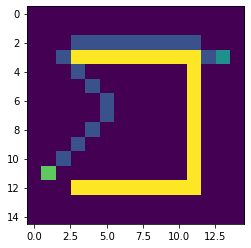

In [459]:
start = (12,0)
goal = (3,13)

path = bfs(start, goal, m)
m.show_path(path)

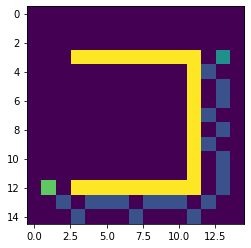

In [458]:
start = (12,0)
goal = (3,13)

path = ucs(start, goal, m)
m.show_path(path)

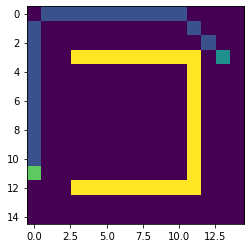

In [460]:
start = (12,0)
goal = (3,13)

path = hs(start, goal, m)
m.show_path(path)

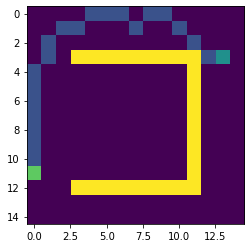

In [461]:
start = (12,0)
goal = (3,13)

path = astar(start, goal, m)
m.show_path(path)